### Exploratory Data Analysis (EDA)

Overview of the Data:

In [ ]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# read dataset
df = pd.read_csv("../data/raw/data.csv")

In [ ]:
df.head() # Checking sample data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [14]:
df.info() # checking the number of columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

Summery Statistics

In [15]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


Distribution of Numerical Features

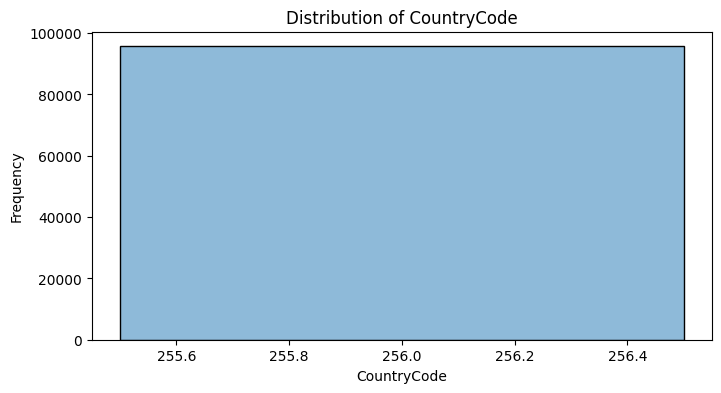

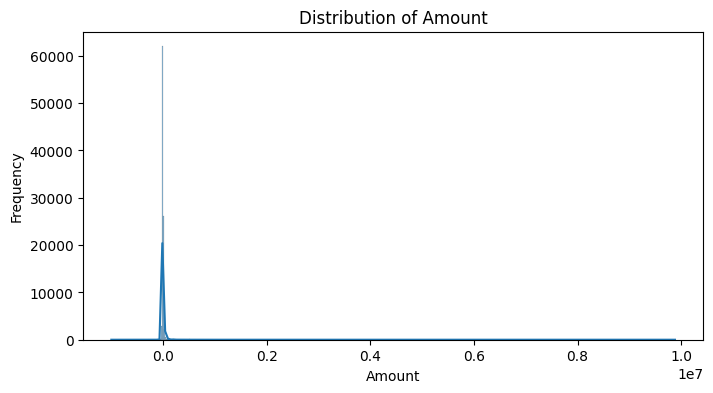

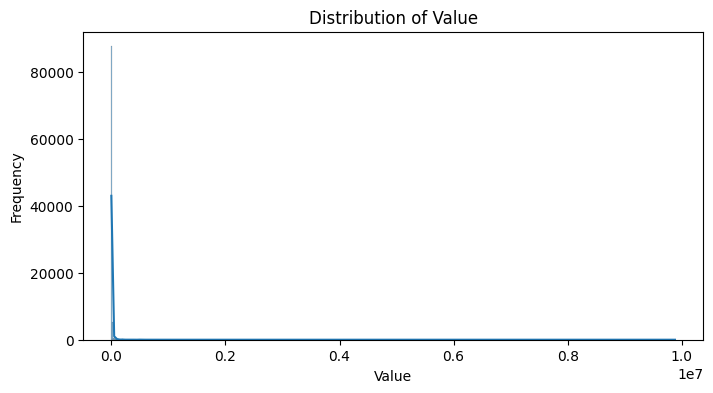

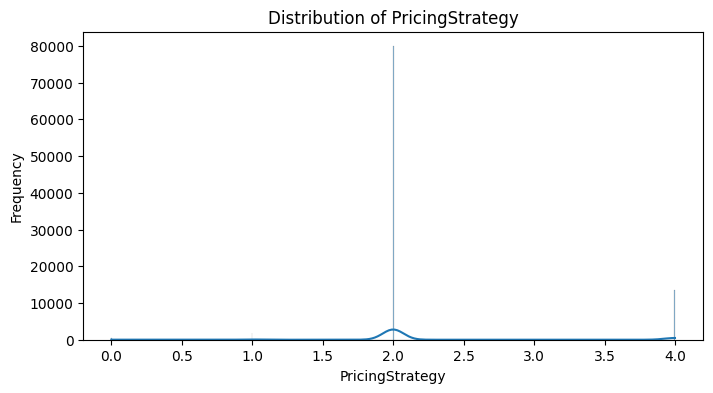

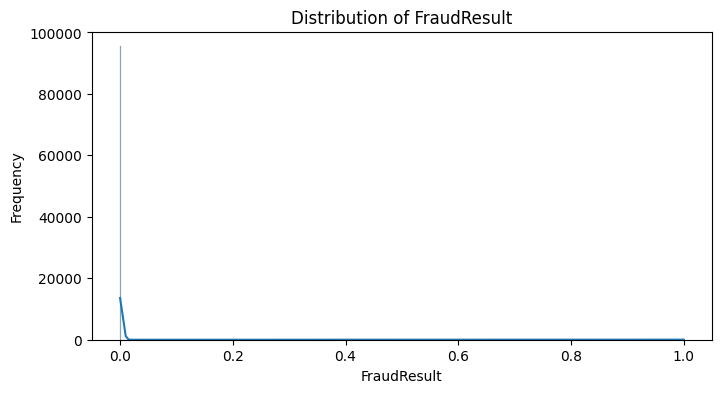

In [ ]:
# Visualize the distibution of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Distribution of Categorical Features

Feature 'TransactionId' has a high number of unique values (95662).
Top 10 most frequent values:
TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
TransactionId_130161    1
Name: count, dtype: int64
------------------------------
Feature 'BatchId' has a high number of unique values (94809).
Top 10 most frequent values:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_86880      6
BatchId_22960      6
Name: count, dtype: int64
------------------------------
Feature 'AccountId' has a high number of unique values (3633).
Top 10 most frequent values:
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountI

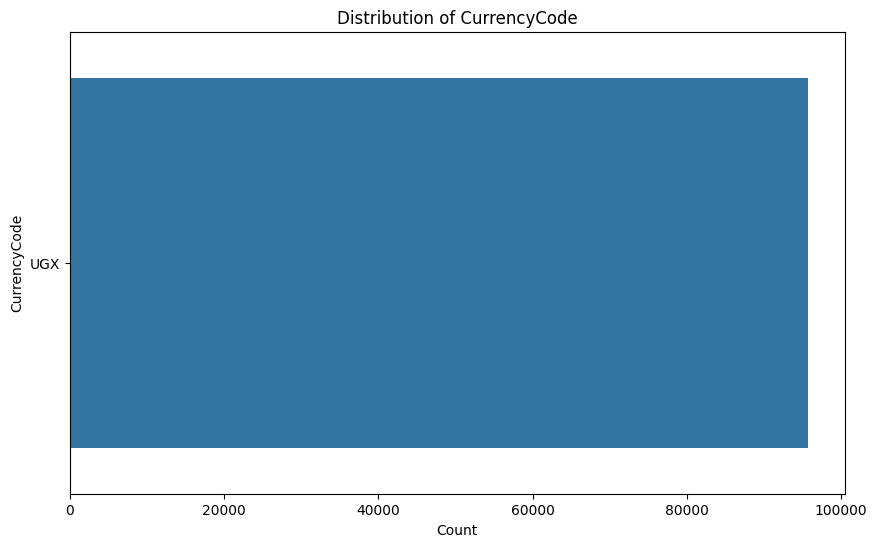

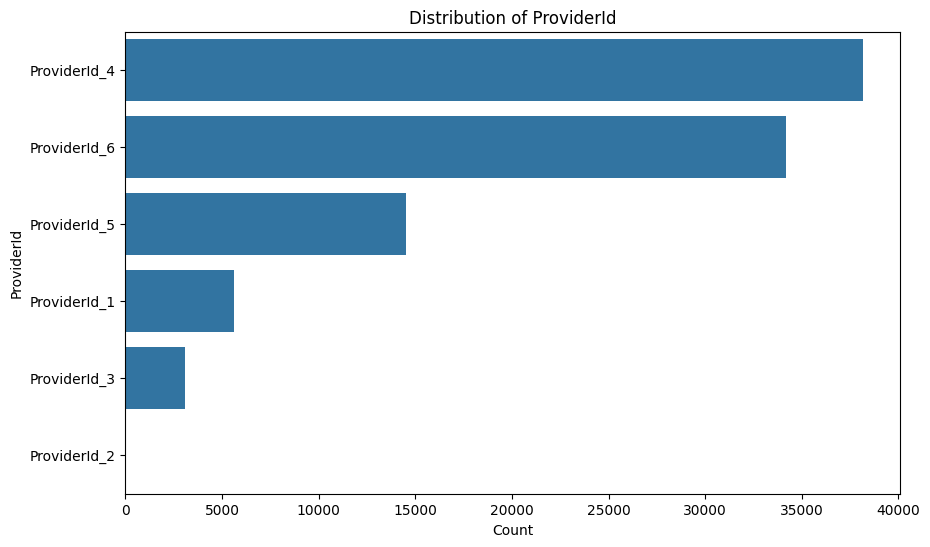

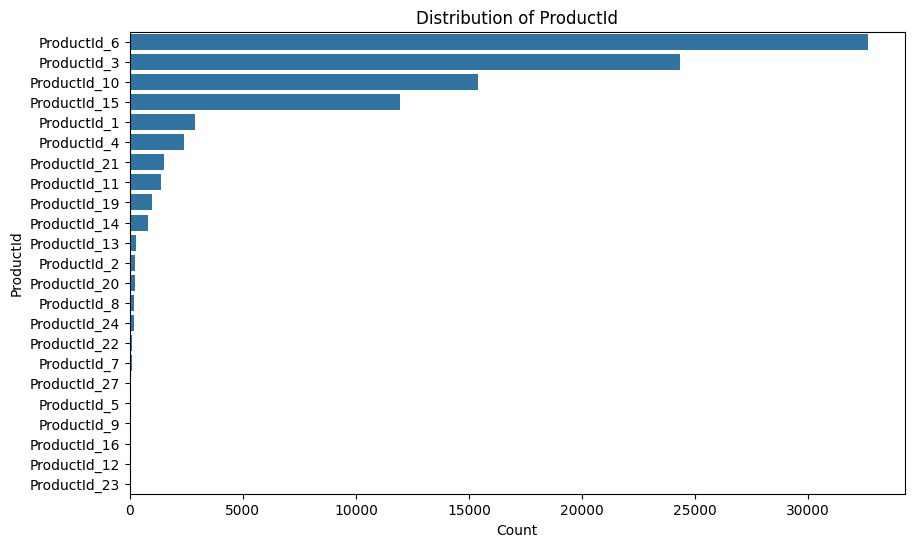

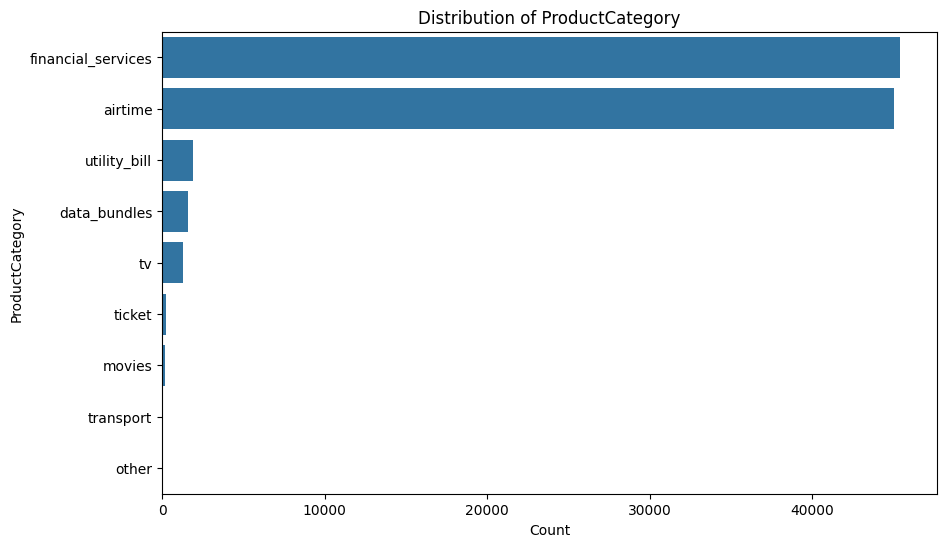

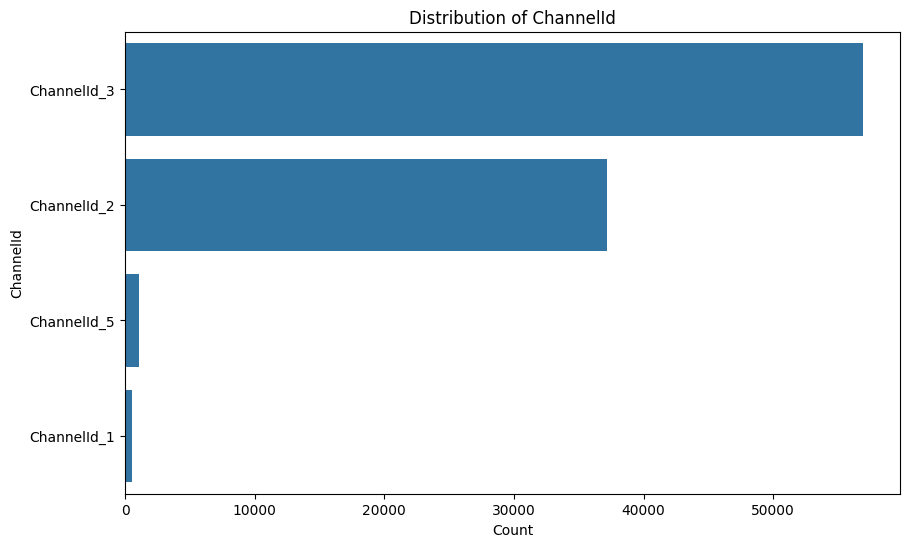

Feature 'TransactionStartTime' has a high number of unique values (94556).
Top 10 most frequent values:
TransactionStartTime
2018-12-24T16:30:13Z    17
2018-11-15T07:03:26Z     9
2018-12-07T13:09:44Z     6
2018-12-24T16:30:12Z     6
2018-11-15T07:03:27Z     5
2018-12-07T13:09:47Z     4
2018-12-24T16:30:11Z     4
2018-12-07T11:54:01Z     4
2019-01-04T04:29:41Z     4
2019-01-14T17:24:54Z     4
Name: count, dtype: int64
------------------------------


In [21]:
# Visualize the distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    if df[feature].nunique() < 50:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=df[feature], order = df[feature].value_counts().index)
        plt.title(f'Distribution of {feature}')
        plt.xlabel('Count')
        plt.ylabel(feature)
        plt.show()
    else:
        print(f"Feature '{feature}' has a high number of unique values ({df[feature].nunique()}).")
        print("Top 10 most frequent values:")
        print(df[feature].value_counts().head(10))
        print("-" * 30)


Categorical Analysis

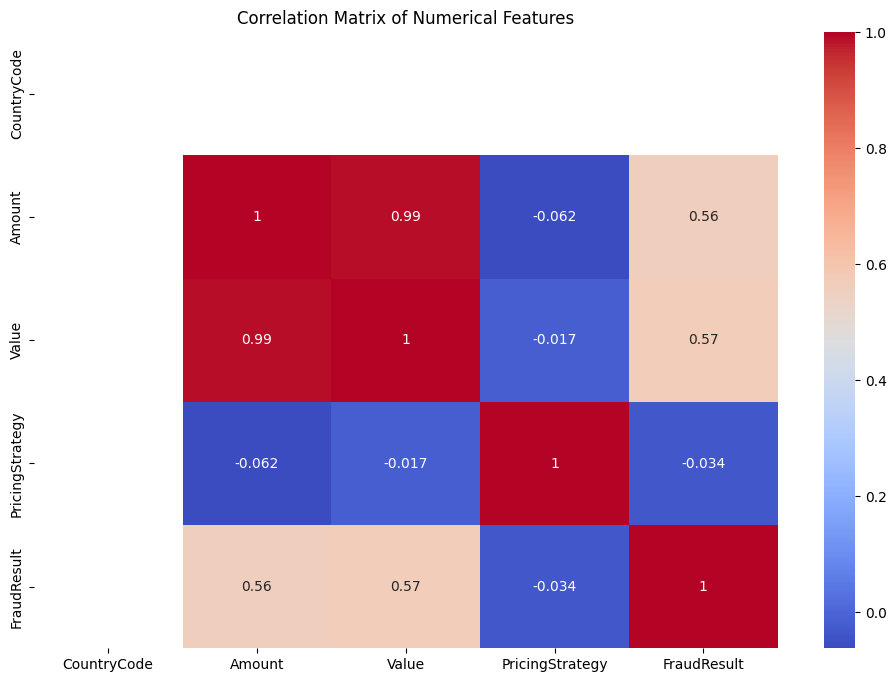

In [20]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Identifying missing Values

In [18]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in each column:")
print(missing_values)

# Visualize missing values
if not missing_values.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_values.index, y=missing_values.values)
    plt.title('Missing Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("\nNo missing values found in the dataset.")

Missing values in each column:
Series([], dtype: int64)

No missing values found in the dataset.


Outlier Detection

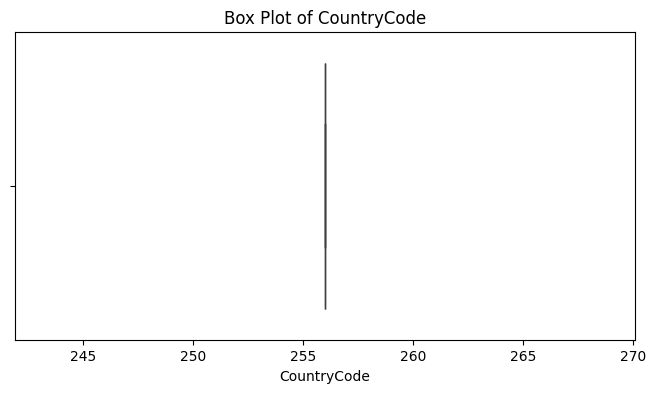

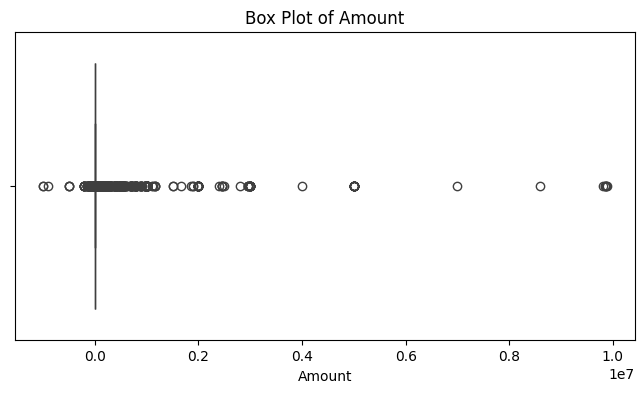

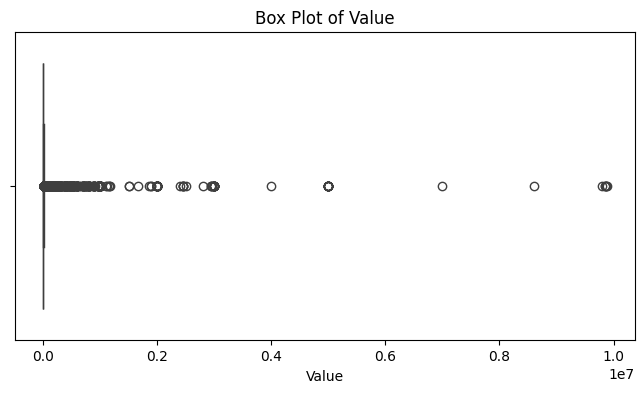

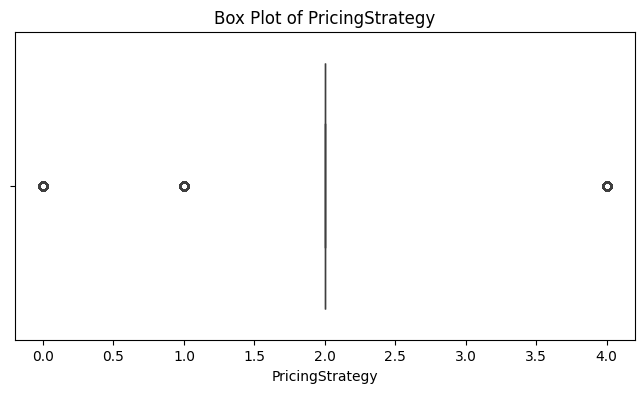

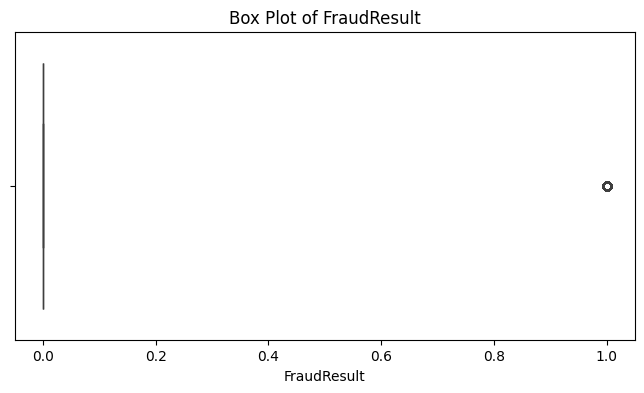

In [19]:
# Use box plots to identify outliers in numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()


### Summary of Findings

Based on the analysis above, here are the top 3-5 most important insights:

1. **High Cardinality in Categorical Features:** Several categorical columns, such as TransactionId, BatchId, AccountId, SubscriptionId, and CustomerId, have a very high number of unique values. This suggests they are identifiers and will likely need to be handled carefully or excluded from direct use in the model to avoid overfitting.
2.  **No Missing Data:** The dataset is complete, with no missing values across any of the columns. This simplifies the data preprocessing phase, as no imputation strategies are required. 
3.  **Outliers in Transaction Amount:** The Amount and Value columns show significant outliers, as seen in the box plots. A few transactions have very large values compared to the majority, which could skew the model. These may need to be investigated or handled using techniques like transformation or capping.
4.  **Dominant Product Categories:** The distribution of ProductCategory shows that "financial services" and "airtime" are the most frequent categories. This indicates that a large portion of the transactions are related to these two services.
5.  **Low Fraud Rate:** The FraudResult column is highly imbalanced, with a very small number of transactions marked as fraudulent (value of 1). This is important to consider when building the risk model, as it might require special techniques to handle the class imbalance.